In [1]:
from src import *

2023-09-12 13:31:52.478225: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
agent = Agent(restaurant_array=[2,6,2], learning_rate=1e-4, grid_size=100, randseed=25)
# agent = Agent(restaurant_array=[2,6,2], grid_size=100, randseed=25, filename="models/model_n3_200")

2023-09-12 13:31:54.960701: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.


In [24]:
episodios=20
episodios_terminados=700
decay=0.998

agent.train(episodes=episodios, finished_episodes=episodios_terminados, batch_size=16, epsilon=1,
             epsilon_decay=decay, score_limit=190, log_limit=192, refresh_rate=2, verbose=False, display_rewards=False)

agent.save("models/model_n3_"+str(episodios_terminados+episodios))

episode: 701/720, score: 173.03, e: 0.25, actions: 263, couriers: 56, t: 10.49s
episode: 702/720, score: 63.98, e: 0.25, actions: 155, couriers: 52, t: 7.87s
episode: 703/720, score: 190.75, e: 0.25, actions: 196, couriers: 19, t: 10.76s
episode: 704/720, score: 190.50, e: 0.24, actions: 189, couriers: 17, t: 10.14s
episode: 705/720, score: 190.58, e: 0.24, actions: 190, couriers: 17, t: 10.23s
episode: 706/720, score: 190.18, e: 0.24, actions: 196, couriers: 14, t: 10.67s
episode: 707/720, score: 190.84, e: 0.24, actions: 196, couriers: 18, t: 9.79s
episode: 708/720, score: 190.86, e: 0.24, actions: 200, couriers: 20, t: 10.66s
episode: 709/720, score: 190.36, e: 0.24, actions: 192, couriers: 10, t: 10.67s
episode: 710/720, score: 190.04, e: 0.24, actions: 209, couriers: 23, t: 10.94s
episode: 711/720, score: 191.08, e: 0.24, actions: 215, couriers: 27, t: 10.72s
episode: 712/720, score: 191.06, e: 0.24, actions: 218, couriers: 29, t: 10.46s
episode: 713/720, score: 167.21, e: 0.24, a

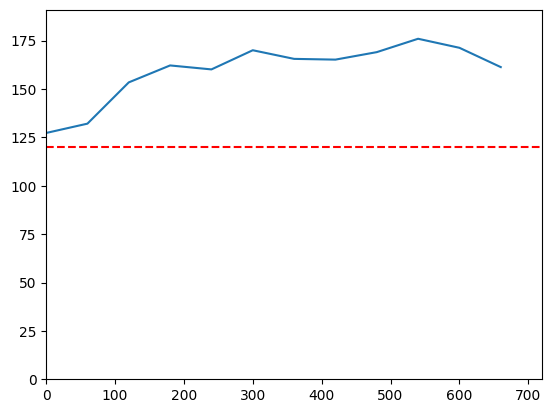

In [28]:
agent.rewards_graphic(n=60,mean=120, ylim=191)

In [26]:
agent.print_prediction([[0,0,0,0,0,0,0,1,0]])
# print(agent.model.predict([[0,1,0,100000,0,0,0,2,0]], verbose=0))
# agent.model.get_weights()[-1]

|      | Invo |  C1  |  C2  |  C3  |
|  C1  |1.9303|  --  |1.9487|2.1452|
|  C2  |1.9792|2.1598|  --  |2.0669|
|  C3  |2.0588|2.1333|2.1453|  --  |


In [6]:
test_agent = Agent(restaurant_array=[2,6,2], grid_size=100, randseed=25)
test_agent.train(1000,epsilon_decay=1.0,train_model=False,log=False)

In [9]:
np.median(np.array(test_agent.reward_history))

-119.14946284720054

(array([  3.,  12.,  31.,  93., 201., 289., 228., 119.,  23.,   1.]),
 array([-206.42575921, -190.70963908, -174.99351895, -159.27739882,
        -143.56127869, -127.84515856, -112.12903843,  -96.41291829,
         -80.69679816,  -64.98067803,  -49.2645579 ]),
 <BarContainer object of 10 artists>)

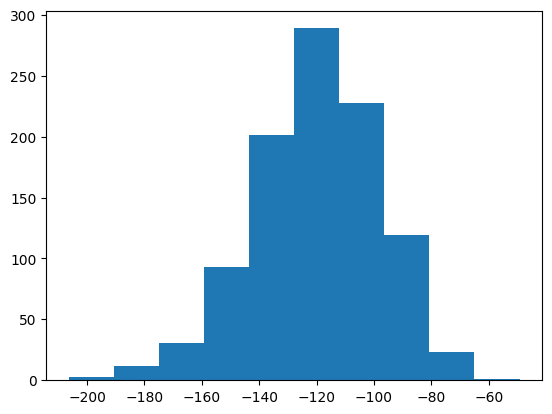

In [8]:
plt.hist(test_agent.reward_history)

In [ ]:
agent.reset()
get_memory_usage()

In [ ]:
agent.map.display_map_clusters()

In [ ]:
episodios_terminados = 0
rewards = agent.train(episodes=1, batch_size=16, epsilon=0.99**episodios_terminados, epsilon_decay=0.99)

In [16]:
agent.test_state([0,0,0,0,1,0,0,0,0])

[STATE]:  [[0], [0], [0], [0], [1], [0], [0], [0], [0]]
[ACTION]: C_0++, R:-1
[STATE]:  [[1], [0], [0], [0], [1], [0], [0], [0], [0]]
[ACTION]: C_0 -> C_1, R: 0.0525594901040716
score: -0.95


In [ ]:
plt.plot(rewards)

In [ ]:
agent.save("model")

In [ ]:
agent.model.get_weights()[-1]